In [61]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [62]:
m = 10000
n = 1000
# W1 = np.random.uniform(-0.5, 0.5, (2, 1))
# W2 = np.random.uniform(-0.5, 0.5, (1, 2))
# b1 = np.random.uniform(-0.5, 0.5, (2, 1))
# b2 = np.random.uniform(-0.5, 0.5, (1, 1))
W1 = np.array([[-1.0], [-1.0]])
W2 = np.array([[1., -1.]])
b1 = np.array([[90.], [270.]])
b2 = np.array([[0.]])
k = 50000
alpha = 0.01
cost_arr = list()


In [63]:
def generate_dataset(size):
    x_train = list()
    y_train = list()
    for i in range(size):
        degree_value = random.uniform(0, 360)
        cosine_value = math.cos(math.radians(degree_value))
        x_train.append(degree_value)
        if cosine_value > 0:
            y_train.append(1)
        else:
            y_train.append(0)
    x_train = np.array(x_train).reshape(1, len(x_train))
    y_train = np.array(y_train).reshape(1, len(y_train))
    return x_train, y_train

In [64]:
def logistic_regression(X, Y):
    global W1, W2, b1, b2
    Z1 = np.dot(W1, X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    A1 = np.clip(A1, 1e-12, 1 - 1e-12)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    A2 = np.clip(A2, 1e-12, 1 - 1e-12)

    cost_arr.append(-np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)))

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1


In [65]:
def testing_accuracy_and_cost(size, X, Y):
    accuracy = 0
    y_classified = list()
    Z1 = np.dot(W1, X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    A1 = np.clip(A1, 1e-12, 1 - 1e-12)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    A2 = np.clip(A2, 1e-12, 1 - 1e-12)
    for i in range(size):
        if A2[0, i] > 0.5:
            y_classified.append(np.array([[1]]))
            if Y[0, i] == 1: accuracy += 1
        elif A2[0, i] < 0.5:
            y_classified.append(0)
            if Y[0, i] == 0: accuracy += 1
    accuracy = accuracy / size * 100
    cost = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    return accuracy, cost, y_classified

/var/folders/84/60qlylj12070w_hl5lhc6r700000gn/T/ipykernel_26331/3682989771.py:4: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))


[[-4.04614518]
 [-4.08536439]] [[ 362.53182295]
 [1103.839584  ]] [[ 42.15972782 -40.90354012]] [[34.83094291]]


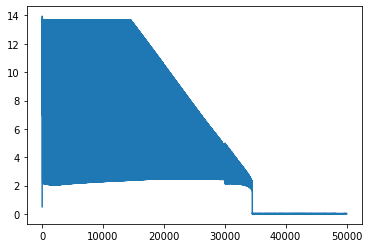

/var/folders/84/60qlylj12070w_hl5lhc6r700000gn/T/ipykernel_26331/3930897134.py:5: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
/var/folders/84/60qlylj12070w_hl5lhc6r700000gn/T/ipykernel_26331/470128472.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(y_classified).reshape(1, len(y_classified))


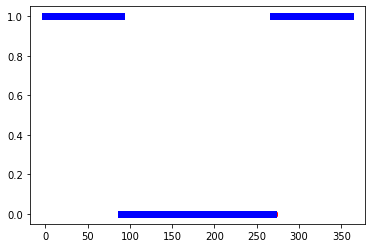

99.92 0.0043126800209139955


/var/folders/84/60qlylj12070w_hl5lhc6r700000gn/T/ipykernel_26331/3930897134.py:5: RuntimeWarning: overflow encountered in exp
  A1 = 1 / (1 + np.exp(-Z1))
/var/folders/84/60qlylj12070w_hl5lhc6r700000gn/T/ipykernel_26331/470128472.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result2 = np.array(y_classified).reshape(1, len(y_classified))


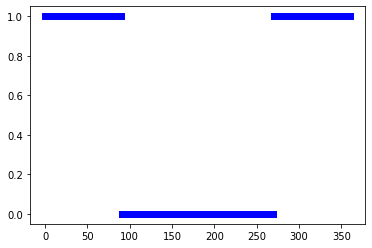

100.0 0.001199042866475609


In [66]:
if __name__ == '__main__':
    x_train, y_train = generate_dataset(m)
    x_test, y_test = generate_dataset(n)
    for i in range(1, k+1):
        logistic_regression(x_train, y_train)
        # if i % 500 == 0: print(W1, b1, W2, b2)
    print(W1, b1, W2, b2)
    plt.plot(cost_arr)
    plt.show()

    accuracy, cost, y_classified = testing_accuracy_and_cost(m, x_train, y_train)
    result = np.array(y_classified).reshape(1, len(y_classified))
    plt.plot(x_train, y_train, 'ro')
    plt.plot(x_train, result, 'bs')
    plt.show()
    print(accuracy, cost)

    accuracy2, cost2, y_classified = testing_accuracy_and_cost(n, x_test, y_test)
    result2 = np.array(y_classified).reshape(1, len(y_classified))
    plt.plot(x_test, y_test, 'ro')
    plt.plot(x_test, result2, 'bs')
    plt.show()
    print(accuracy2, cost2)